<a href="https://colab.research.google.com/github/jakecho1108/Project-2/blob/main/Project2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('/content/adult.csv')
df.head()
df = df.drop_duplicates()
df=df.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'workclass', 'education', 'occupation', 'relationship', 'marital-status'], axis =1)

#Remove unnecessary data
df.head()

,age,educational-num,race,gender,hours-per-week,native-country,income
0,25,7,Black,Male,40.0,United-States,<=50K
1,38,9,White,Male,50.0,United-States,<=50K
2,28,12,White,Male,40.0,United-States,>50K
3,44,10,Black,Male,40.0,United-States,>50K
4,18,10,White,Female,30.0,United-States,<=50K


In [7]:
df['age'].value_counts()
df['educational-num'].value_counts()
df['race'].value_counts()
df['gender'].value_counts()
df['hours-per-week'].value_counts()
df['native-country'].value_counts()
df = df.loc[df['native-country'] == 'United-States']
df = df.replace({'<=50K': 0, '>50K': 1})
df = df.replace({'Male': 0, 'Female': 1})
df = df.replace({'United-States': 0})
df = df.replace({'White': 0, 'Black': 1, 'Amer-Indian-Eskimo':2, 'Asian-Pac-Islander':3, 'Other':4})
df=df.drop(['native-country'], axis =1)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
y = df['income']
X = df.drop(['income'], axis=1)
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


scaler = StandardScaler()

# apply PCA
pca = PCA(n_components=0.95, random_state=42)


In [15]:
import matplotlib.pyplot as plt
from seaborn import heatmap
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(5, 5))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=10)
  plt.ylabel('True', fontsize=10)
  plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Without PCA
knn = KNeighborsClassifier()

# Now we will build the pipeline
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.86      0.92      0.89     19588
           1       0.67      0.53      0.59      6305

    accuracy                           0.82     25893
   macro avg       0.76      0.72      0.74     25893
weighted avg       0.81      0.82      0.81     25893

Test Report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87      6593
           1       0.57      0.44      0.49      2038

    accuracy                           0.79      8631
   macro avg       0.71      0.67      0.68      8631
weighted avg       0.78      0.79      0.78      8631



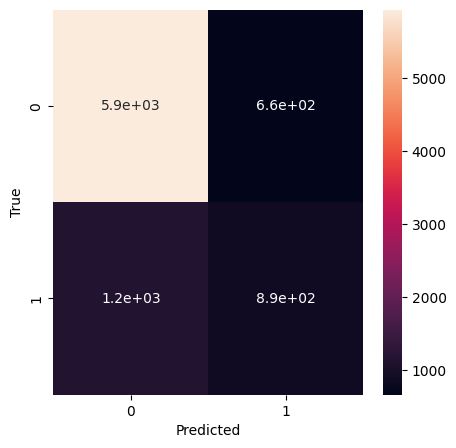

In [16]:
# evaluate the pipeline
eval_classification(knn_pipe, X_train, X_test, y_train, y_test)

In [17]:
# Now we will build the pipeline
knn_pca_pipe = make_pipeline(scaler, pca, knn)

# fit the pipeline
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.86      0.91      0.88     19588
           1       0.65      0.52      0.58      6305

    accuracy                           0.82     25893
   macro avg       0.75      0.72      0.73     25893
weighted avg       0.81      0.82      0.81     25893

Test Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86      6593
           1       0.55      0.44      0.48      2038

    accuracy                           0.78      8631
   macro avg       0.69      0.66      0.67      8631
weighted avg       0.77      0.78      0.77      8631



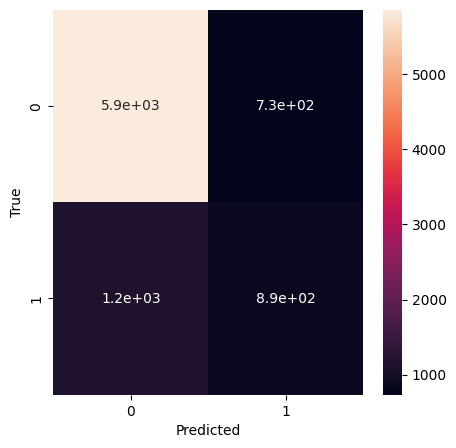

In [18]:
# evaluate the pipeline

eval_classification(knn_pca_pipe, X_train, X_test, y_train, y_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
# Without PCA
dt = DecisionTreeClassifier()

dt_pipe = make_pipeline(scaler, dt)

dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92     19588
           1       0.82      0.59      0.69      6305

    accuracy                           0.87     25893
   macro avg       0.85      0.78      0.80     25893
weighted avg       0.86      0.87      0.86     25893

Test Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      6593
           1       0.53      0.41      0.46      2038

    accuracy                           0.78      8631
   macro avg       0.68      0.65      0.66      8631
weighted avg       0.76      0.78      0.77      8631



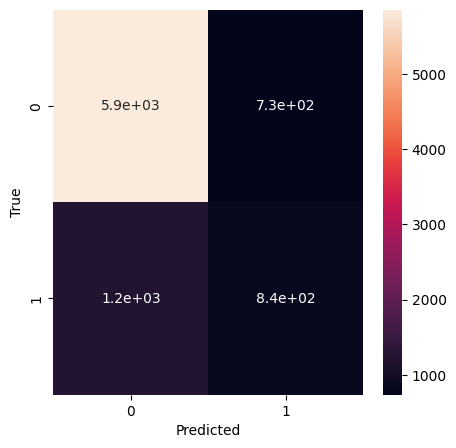

In [20]:
# evaluate the pipeline
eval_classification(dt_pipe, X_train, X_test, y_train, y_test)

In [21]:
# Now we will build the pipeline
dt_pca_pipe = make_pipeline(scaler, pca, dt)

# fit the pipeline
dt_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Train Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92     19588
           1       0.82      0.59      0.69      6305

    accuracy                           0.87     25893
   macro avg       0.85      0.78      0.80     25893
weighted avg       0.86      0.87      0.86     25893

Test Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      6593
           1       0.54      0.41      0.47      2038

    accuracy                           0.78      8631
   macro avg       0.68      0.65      0.66      8631
weighted avg       0.76      0.78      0.77      8631



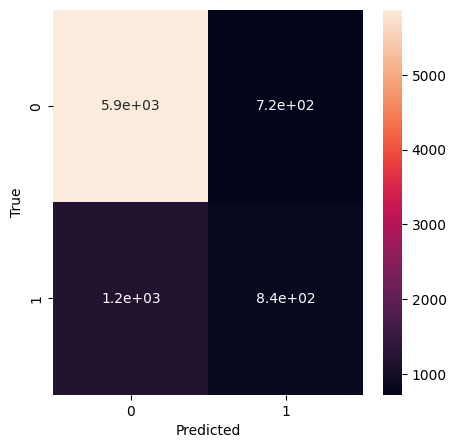

In [22]:
# evaluate the pipeline
eval_classification(dt_pca_pipe, X_train, X_test, y_train, y_test)

In [26]:
from sklearn.model_selection import GridSearchCV
knn_grid = {'pca__n_components':[.5, .7, .9, None],
            'kneighborsclassifier__n_neighbors':[1, 5, 10, 20]}

knn_grid = GridSearchCV(knn_pca_pipe, param_grid=knn_grid, cv=3)

Train Report:               precision    recall  f1-score   support

           0       0.84      0.93      0.88     19588
           1       0.68      0.43      0.53      6305

    accuracy                           0.81     25893
   macro avg       0.76      0.68      0.71     25893
weighted avg       0.80      0.81      0.80     25893

Test Report:               precision    recall  f1-score   support

           0       0.83      0.93      0.88      6593
           1       0.64      0.40      0.49      2038

    accuracy                           0.80      8631
   macro avg       0.74      0.66      0.68      8631
weighted avg       0.79      0.80      0.79      8631



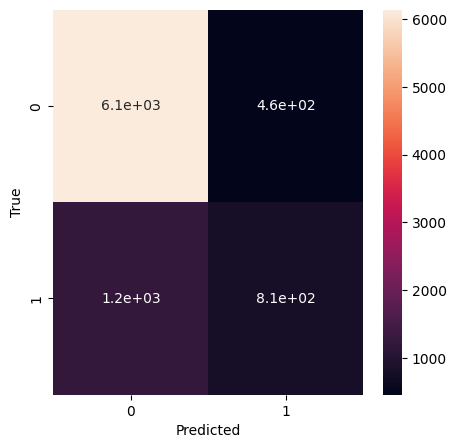

In [27]:
knn_grid.fit(X_train, y_train)

eval_classification(knn_grid, X_train, X_test, y_train, y_test)

In [28]:
dt_pca_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA(n_components=0.95, random_state=42)),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(n_components=0.95, random_state=42),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.95,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decr

In [37]:
dt_grid = {'pca__n_components':[.5, .7, .9, None],
           'decisiontreeclassifier__max_depth': [2,4,6,8,10,12]}

dt_grid = GridSearchCV(dt_pca_pipe, param_grid=dt_grid, cv=3)

Train Report:               precision    recall  f1-score   support

           0       0.83      0.94      0.88     19588
           1       0.68      0.39      0.50      6305

    accuracy                           0.81     25893
   macro avg       0.75      0.67      0.69     25893
weighted avg       0.79      0.81      0.79     25893

Test Report:               precision    recall  f1-score   support

           0       0.83      0.94      0.88      6593
           1       0.66      0.37      0.48      2038

    accuracy                           0.81      8631
   macro avg       0.75      0.66      0.68      8631
weighted avg       0.79      0.81      0.79      8631



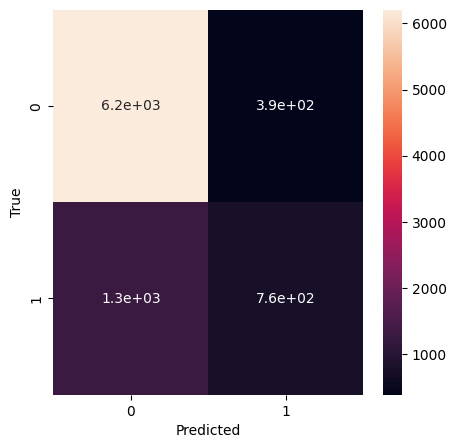

In [38]:
dt_grid.fit(X_train, y_train)

eval_classification(dt_grid, X_train, X_test, y_train, y_test)

The PCA Decision tree model is the best one because it had the highest F1 score.
